# **SDG Prediction**

## **Dependencies**

In [56]:
from transformers import pipeline
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

## **SDG Classifier**

### Load CSV

In [26]:
df = pd.read_csv("../../src/SDG_VAL.csv")
df["sgd_pred_code"] = "NaN"
df.head(1)

,pn,"Projektbezeichnung, deutsch","Projektbezeichnung, englisch",CRS-Schlüssel,CRS-Bezeichnung,CRS-Gewichtung,2. CRS-Schlüssel,2. CRS-Bezeichnung,2. CRS-Gewichtung,3. CRS-Schlüssel,3. CRS-Bezeichnung,3. CRS-Gewichtung,4. CRS-Schlüssel,4. CRS-Bezeichnung,4. CRS-Gewichtung,SDG Hauptziele,"Projektziele, deutsch","Projektziele, englisch",BMZ-Schwerpunkt,iati_id,title_en,description_main,sgd_pred_code
0,2014.0968.9,Globalvorhaben Ernährungssicherung und Resilienzstärkung,"Global programme Food and Nutrition Security, Enhanced Resilience",43072.0,Programme zur Ernährungssicherung auf Haushaltsebene,0.7,43071.0,Politiken/Verwaltungsführung zur Ernährungssicherung,0.3,NaN,NaN,NaN,NaN,NaN,NaN,02;,"Die Ernährungssituation und die Resilienz gegenüber Hungerkrisen auf Haushaltsebene von ernährungsgefärdeten Menschen, insbesondere von Frauen im reproduktiven Alter und Kleinkindern, haben sich verbessert.","The food situation and the resilience to hunger crises at household level of food-insecure people, especially women of reproductive age and small children, have improved.","Sicherung der Ernährung, Landwirtschaft",DE-1-201409689,"Global programme Food and Nutrition Security, Enhanced Resilience","The food situation and the resilience to hunger crises at household level of food-insecure people, especially women of reproductive age and small children, have improved.; The food situation and the resilience to hunger crises at household level of food-insecure people, especially women of reproductive age and small children, have improved.",NaN


### Load SDG CSV

In [27]:
sdg_df = pd.read_csv("../../src/codelists/sdg_goals.csv")
sdg_df.head(1)

,code,name,description,language,category,category-name,category-description
0,1,Goal 1. End poverty in all its forms everywhere,NaN,en,NaN,NaN,NaN


In [28]:
sdg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code                  17 non-null     int64  
 1   name                  17 non-null     object 
 2   description           0 non-null      float64
 3   language              17 non-null     object 
 4   category              0 non-null      float64
 5   category-name         0 non-null      float64
 6   category-description  0 non-null      float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.1+ KB


### Apply Model

In [29]:
pipe = pipeline("text-classification", model="jonas/roberta-base-finetuned-sdg")

In [30]:
df["sgd_pred_code"] = "NaN"
df["sgd_pred_str"] = "NaN"

for index, row in df.iterrows():
    descr_row = row['description_main']
    try:
        # nan in pandas is type float
        # check if nan 
            if isinstance(descr_row, float):
                df["sgd_pred_code"][index] = "NaN"
                df["sgd_pred_str"][index] = "NaN"
            else:
                if len(descr_row) > 512:
                    descr_row = descr_row[:512]
                # use clf with description and predict sgd 
                pred = pipe(descr_row)
                pred_str = pred[0]["label"]
                pred_int = int(pred_str)

                # Map sgd codes to names
                sdg_translation = sdg_df.loc[sdg_df['code'] == pred_int, 'name']

                df["sgd_pred_code"][index] = pred_int
                df["sgd_pred_str"][index] = sdg_translation
    except Exception as e:
        print(f"{e}: {descr_row}")

df.head()

C:\Users\UserNA6153\AppData\Local\Temp\ipykernel_15356\2275479254.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sgd_pred_code"][index] = pred_int
C:\Users\UserNA6153\AppData\Local\Temp\ipykernel_15356\2275479254.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sgd_pred_str"][index] = sdg_translation
C:\Users\UserNA6153\AppData\Local\Temp\ipykernel_15356\2275479254.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

,pn,"Projektbezeichnung, deutsch","Projektbezeichnung, englisch",CRS-Schlüssel,CRS-Bezeichnung,CRS-Gewichtung,2. CRS-Schlüssel,2. CRS-Bezeichnung,2. CRS-Gewichtung,3. CRS-Schlüssel,3. CRS-Bezeichnung,3. CRS-Gewichtung,4. CRS-Schlüssel,4. CRS-Bezeichnung,4. CRS-Gewichtung,SDG Hauptziele,"Projektziele, deutsch","Projektziele, englisch",BMZ-Schwerpunkt,iati_id,title_en,description_main,sgd_pred_code,sgd_pred_str
0,2014.0968.9,Globalvorhaben Ernährungssicherung und Resilienzstärkung,"Global programme Food and Nutrition Security, Enhanced Resilience",43072.0,Programme zur Ernährungssicherung auf Haushaltsebene,0.7,43071.0,Politiken/Verwaltungsführung zur Ernährungssicherung,0.3,NaN,NaN,NaN,NaN,NaN,NaN,02;,"Die Ernährungssituation und die Resilienz gegenüber Hungerkrisen auf Haushaltsebene von ernährungsgefärdeten Menschen, insbesondere von Frauen im reproduktiven Alter und Kleinkindern, haben sich verbessert.","The food situation and the resilience to hunger crises at household level of food-insecure people, especially women of reproductive age and small children, have improved.","Sicherung der Ernährung, Landwirtschaft",DE-1-201409689,"Global programme Food and Nutrition Security, Enhanced Resilience","The food situation and the resilience to hunger crises at household level of food-insecure people, especially women of reproductive age and small children, have improved.; The food situation and the resilience to hunger crises at household level of food-insecure people, especially women of reproductive age and small children, have improved.",2,"1 Goal 2. End hunger, achieve food security and improved nutrition and promote sustainable agriculture Name: name, dtype: object"
1,2014.2456.3,Beschäftigung für nachhaltige Wirtschaftentwicklung in Afrika,Employment and Skills for Development in Africa,25010.0,Geschäftspolitik und -verwaltung,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08;,"Die Beschäftigungs- und wirtschaftliche Situation von Arbeitsuchenden, Angestellten und Unternehmen hat sich im Rahmen öffentlich-privater K","The employment- and economic situation of job seekers, employees and enterprises is improved in cooperation with the public and private sector.",Nachhaltige Wirtschaftsentwicklung,DE-1-201424563,Employment and Skills for Development in Africa,"The employment- and economic situation of job seekers, employees and enterprises is improved in cooperation with the public and private sector.; The employment- and economic situation of job seekers, employees and enterprises is improved in cooperation with the public and private sector.",8,"7 Goal 8. Promote sustained, inclusive and sustainable economic growth, full and productive employment and decent work for all Name: name, dtype: object"
2,2014.4064.3,Verbesserung des Lernumfelds an öffentlichen Schulen in aufnehmenden Gemeinden in Jordanien - ILEPS,Improved Learning Environments at Public Schools in Host Communities in Jordan,11220.0,Grundschulbildung,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04;,Das Lernumfeld an öffentlichen Schulen in aufnehmenden Gemeinden ist verbessert,The learning environment at public schools in host communities is improved,Nachhaltige Wirtschaftsentwicklung,DE-1-201440643,Improved Learning Environments at Public Schools in Host Communities in Jordan,The learning environment at public schools in host communities is improved; The learning environment at public schools in host communities is improved,4,"3 Goal 4. Ensure inclusive and equitable quality education and promote lifelong learning opportunities for all Name: name, dtype: object"
3,2014.4065.0,Förderung partizipativen Ressourcenmanagements zur Stabilisierung der Situation in Flüchtlingsaufnehmenden Gemeinden,Supporting participatory Resource Management to stabilize the Situation in Host Communities,14030.0,"Grundl. Versorg Trinkwasser, Sanitärversorgung, Abwass",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06;,Die Wasserverfügbarkeit in ausgewählten flüchtlingsaufnehmenden Gemeinden ist verbessert.,

In [31]:
len(df)

420

### Analysis

#### Verteilung SDGs

In [32]:
df["sgd_pred_code"].value_counts()

sgd_pred_code
8     137
11     43
9      42
4      39
3      24
5      22
6      20
13     18
7      14
15     14
1      13
12     13
10     11
2      10
Name: count, dtype: int64

In [33]:
df["SDG Hauptziele"].value_counts()

SDG Hauptziele
08;    128
16;    107
04;     79
06;     20
03;     17
13;     14
02;     13
09;     13
10;     13
15;      7
01;      4
11;      2
07;      2
14;      1
Name: count, dtype: int64

In [34]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None) 

In [46]:
analy_df = df[["description_main", "SDG Hauptziele", "sgd_pred_code"]]
analy_df.head()


,description_main,SDG Hauptziele,sgd_pred_code
0,"The food situation and the resilience to hunger crises at household level of food-insecure people, especially women of reproductive age and small children, have improved.; The food situation and the resilience to hunger crises at household level of food-insecure people, especially women of reproductive age and small children, have improved.",02;,2
1,"The employment- and economic situation of job seekers, employees and enterprises is improved in cooperation with the public and private sector.; The employment- and economic situation of job seekers, employees and enterprises is improved in cooperation with the public and private sector.",08;,8
2,The learning environment at public schools in host communities is improved; The learning environment at public schools in host communities is improved,04;,4
3,The water availability in selected host communities is improved.; The water availability in selected host communities is improved.,06;,6
4,Tunisian municipalities have improved citizen participation and transparency.; Tunisian municipalities have improved citizen participation and transparency.,11;,11


In [48]:
analy_df["SDG Hauptziele"] = analy_df["SDG Hauptziele"].str[:2].astype(int).astype(str)
analy_df.head()

C:\Users\UserNA6153\AppData\Local\Temp\ipykernel_15356\795549333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analy_df["SDG Hauptziele"] = analy_df["SDG Hauptziele"].str[:2].astype(int).astype(str)


,description_main,SDG Hauptziele,sgd_pred_code
0,"The food situation and the resilience to hunger crises at household level of food-insecure people, especially women of reproductive age and small children, have improved.; The food situation and the resilience to hunger crises at household level of food-insecure people, especially women of reproductive age and small children, have improved.",2,2
1,"The employment- and economic situation of job seekers, employees and enterprises is improved in cooperation with the public and private sector.; The employment- and economic situation of job seekers, employees and enterprises is improved in cooperation with the public and private sector.",8,8
2,The learning environment at public schools in host communities is improved; The learning environment at public schools in host communities is improved,4,4
3,The water availability in selected host communities is improved.; The water availability in selected host communities is improved.,6,6
4,Tunisian municipalities have improved citizen participation and transparency.; Tunisian municipalities have improved citizen participation and transparency.,11,11


In [51]:
analy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   description_main  420 non-null    object
 1   SDG Hauptziele    420 non-null    object
 2   sgd_pred_code     420 non-null    object
dtypes: object(3)
memory usage: 10.0+ KB


In [49]:
analy_df["SDG Hauptziele"].value_counts()

SDG Hauptziele
8     128
16    107
4      79
6      20
3      17
13     14
2      13
9      13
10     13
15      7
1       4
11      2
7       2
14      1
Name: count, dtype: int64

In [54]:
analy_df["SDG Hauptziele"] = analy_df["SDG Hauptziele"].astype(str)
analy_df["sgd_pred_code"] = analy_df["sgd_pred_code"].astype(str)

C:\Users\UserNA6153\AppData\Local\Temp\ipykernel_15356\634570292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analy_df["SDG Hauptziele"] = analy_df["SDG Hauptziele"].astype(str)
C:\Users\UserNA6153\AppData\Local\Temp\ipykernel_15356\634570292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analy_df["sgd_pred_code"] = analy_df["sgd_pred_code"].astype(str)


In [75]:
sdg_labels = [str(i) for i in range(1, 17)]

cm = confusion_matrix(y_true = analy_df['SDG Hauptziele'], 
                    y_pred = analy_df['sgd_pred_code'], 
                    labels = sdg_labels)

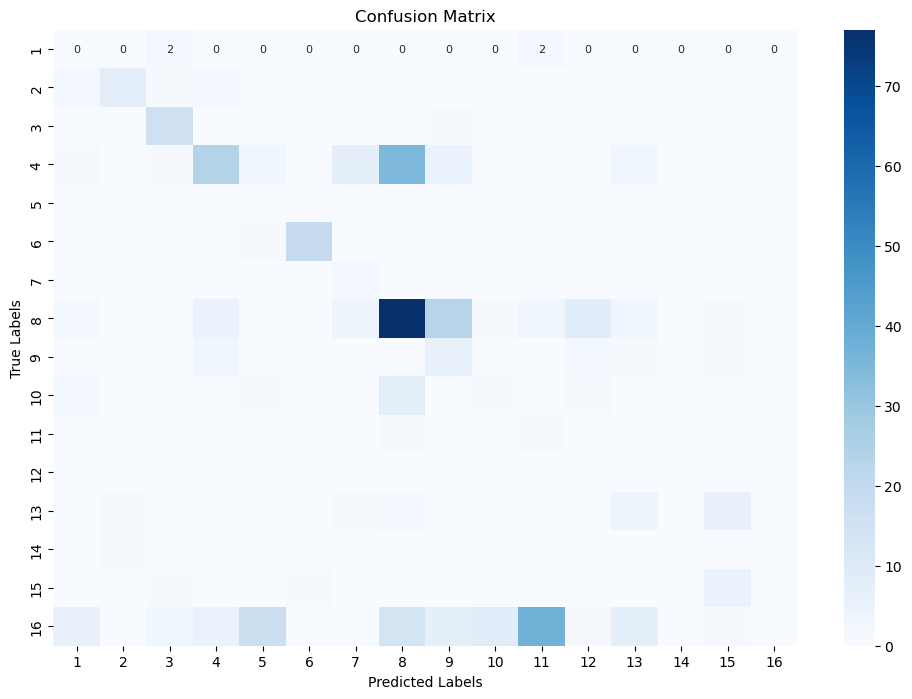

In [76]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm, fmt='d', cmap='Blues', xticklabels=sdg_labels, yticklabels=sdg_labels, annot=True, annot_kws={"size": 8})

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [64]:
analy_df['SDG Hauptziele'].unique()

array(['2', '8', '4', '6', '11', '16', '1', '13', '3', '9', '10', '15',
       '7', '14'], dtype=object)